# STAT3612 Data Mining (2018-19 Semester 2)<a class="anchor" id="top">
## Tutorial Class 4 Visualization \& Manipulation
### _Prepared by Dr. Gilbert Lui_

### Table of Contents:

* [Data Visualization with matplotlib](#plot)
    * [Box plot](#boxplot)
    * [Bar plot](#barplot)
    * [Histogram](#histogram)
    * [Scatter plot](#scatterplot)
    * [Save a graph in PDF or in PNG format](#save)

* [Data Manipulation](#data)
    * [Arrange rows with `sort_values()`](#arrange)
    * [Transform columns with `assign()`](#addcol)
    * [Filter rows with `query()`](#filter)
    * [Group operations with `groupby()`](#group)

## Boston Dataset

The Boston data set contains 506 rows and 14 columns and the observations are stored in the data file `boston.csv`. The data file contains the following columns:

- `crim`: per capita crime rate by town.
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `indus`: proportion of non-retail business acres per town.
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- `nox`: nitrogen oxides concentration (parts per 10 million).
- `rm`: average number of rooms per dwelling.
- `age`: proportion of owner-occupied units built prior to 1940.
- `dis`: weighted mean of distances to five Boston employment centres.
- `rad`: index of accessibility to radial highways.
- `tax`: full-value property-tax rate per \$10,000.
- `ptratio`: pupil-teacher ratio by town.
- `black`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- `lstat`: lower status of the population (percent).
- `medv`: median value of owner-occupied homes in \$1000s.

In [1]:
import pandas as pd
boston = pd.read_csv("boston.csv")
boston.shape

(506, 14)

In [2]:
boston.head(n=10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


## Data Visualization with `matplotlib`<a class="anchor" id="plot"></a>

### Box Plot<a class="anchor" id="boxplot"></a>

#### Basic box plot

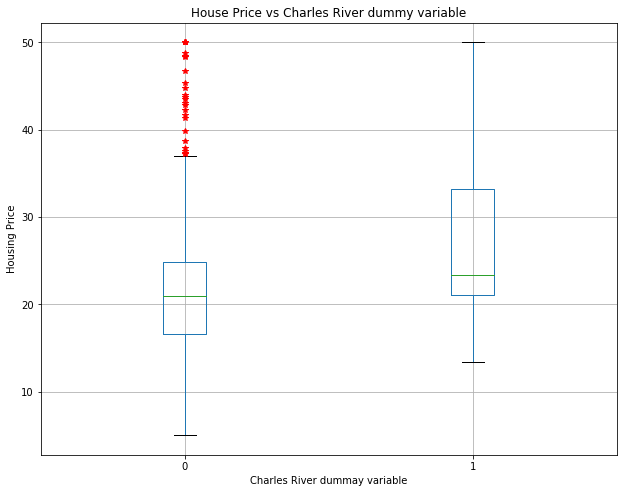

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a 2D ggplot graph, with Charles River dummy variable (chas) as the x_axis and median value of house as the y_axis
r = boston.boxplot(column=['medv'], by='chas', sym='r*', figsize=(10,8))
plt.title("House Price vs Charles River dummy variable")
plt.xlabel("Charles River dummay variable")
plt.ylabel("Housing Price")
plt.suptitle('')
plt.show()

Instead of `matplotlib`, `seaborn` can provide more fancy output.

Text(0, 0.5, 'Housing Price')

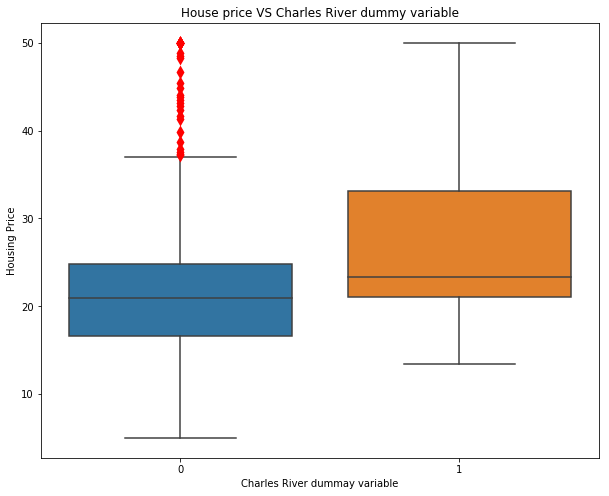

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

flierprops = dict(markerfacecolor='r', markersize=10,
              linestyle='none', markeredgecolor='none')
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=boston["chas"], y=boston["medv"], flierprops=flierprops)
plt.title("House price VS Charles River dummy variable")
plt.xlabel("Charles River dummay variable")
plt.ylabel("Housing Price")

#### Boxplot with multiple groups

Text(0, 0.5, 'Housing Price')

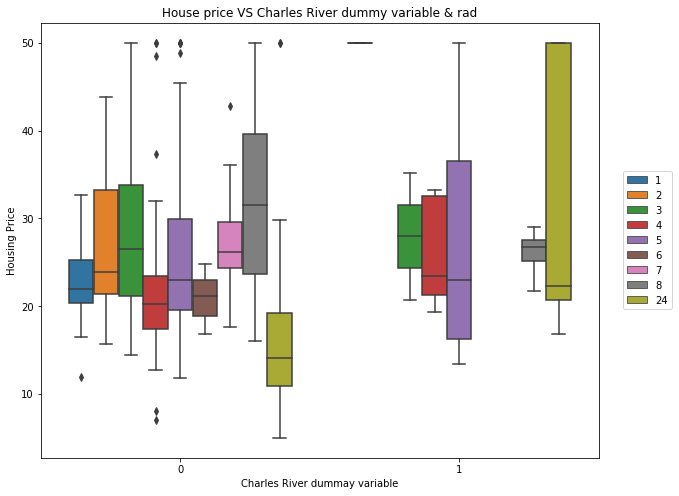

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=boston["chas"], y=boston["medv"], hue=boston["rad"])
plt.legend(bbox_to_anchor=(1.14, 0.5), loc="center right")
plt.title("House price VS Charles River dummy variable & rad")
plt.xlabel("Charles River dummay variable")
plt.ylabel("Housing Price")

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Bar Plot<a class="anchor" id="barplot"></a>

#### Stacked Barplot

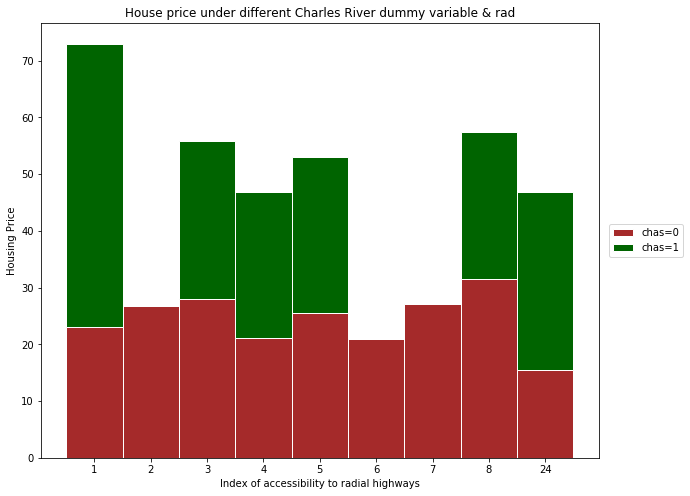

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plotdat = boston[['medv','rad','chas']].groupby(['chas','rad']).mean().reset_index()
indx1 = plotdat.loc[plotdat['chas']==0,'rad'] 
bar1 = plotdat.loc[plotdat['chas']==0,'medv']
bar1.index = indx1
indx2 = plotdat.loc[plotdat['chas']==1,'rad'] 
bar2 = plotdat.loc[plotdat['chas']==1,'medv']
bar2.index = indx2
df = pd.concat([bar1,bar2], axis=1)
df.columns = ['chas=0','chas=1']

barwidth = 0.25

# The position of the bars on the x-axis
r = list(np.arange(df.shape[0]))

# Names of group and bar width
names = df.index.tolist()
barwidth = 1

fig, ax = plt.subplots(figsize=(10,8))

# Make the plot
plt.bar(r, df.iloc[:,0], color='brown', width=barwidth, edgecolor='white')
plt.bar(r, df.iloc[:,1], bottom=df.iloc[:,0], color='darkgreen', width=barwidth, edgecolor='white')

# Add xticks on the middle of the group bars
plt.xlabel('Index of accessibility to radial highways')
plt.xticks(r, names)

# Add title and ylabel
plt.title('House price under different Charles River dummy variable & rad')
plt.ylabel('Housing Price')
plt.legend(bbox_to_anchor=(1.16, 0.5), loc="center right", labels=df.columns)

#### Grouped Barplot

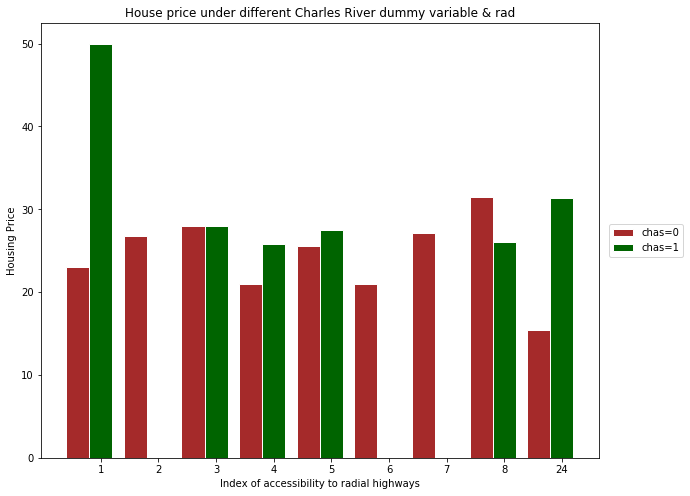

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plotdat = boston[['medv','rad','chas']].groupby(['chas','rad']).mean().reset_index()
indx1 = plotdat.loc[plotdat['chas']==0,'rad'] 
bar1 = plotdat.loc[plotdat['chas']==0,'medv']
bar1.index = indx1
indx2 = plotdat.loc[plotdat['chas']==1,'rad'] 
bar2 = plotdat.loc[plotdat['chas']==1,'medv']
bar2.index = indx2
df = pd.concat([bar1,bar2], axis=1)
df.columns = ['chas=0','chas=1']

barwidth = 0.4

# Set position of bar on x-axis
r1 = np.arange(df.shape[0])
r2 = [x + barwidth for x in r1]

fig, ax = plt.subplots(figsize=(10,8))

# Make the plot
plt.bar(r1, df.iloc[:,0], color='brown', width=barwidth, edgecolor='white', label=df.columns[0])
plt.bar(r2, df.iloc[:,1], color='darkgreen', width=barwidth, edgecolor='white', label=df.columns[1])

# Add xticks on the middle of the group bars
plt.xlabel('Index of accessibility to radial highways')
plt.xticks([r + barwidth for r in range(df.shape[0])], df.index.tolist())

# Add title and ylabel
plt.title('House price under different Charles River dummy variable & rad')
plt.ylabel('Housing Price')

# construct the legend
plt.legend(bbox_to_anchor=(1.16, 0.5), loc="center right", labels=df.columns)

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Histogram<a class="anchor" id="histogram"></a>

#### Histogram with Kernel density with transparency

Text(0, 0.5, 'Density')

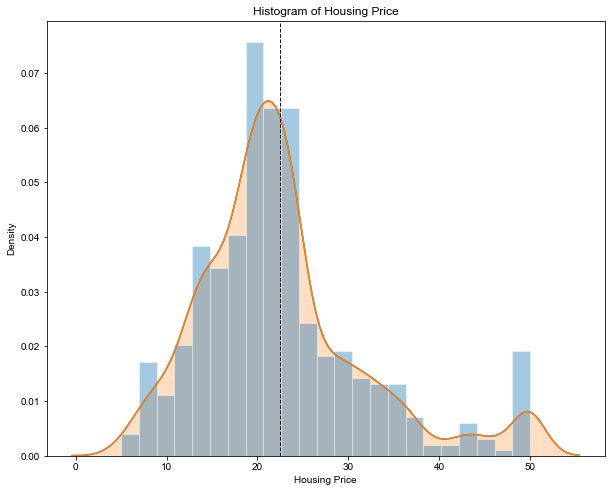

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fig, ax = plt.subplots(figsize=(10,8))
sns.set(color_codes=True)
sns.distplot(boston["medv"])
sns.kdeplot(boston["medv"], shade=True, legend=False)
plt.axvline(boston["medv"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Histogram of Housing Price")
plt.xlabel("Housing Price")
plt.ylabel("Density")

#### Histogram with an overlay normal density

Text(0, 0.5, 'Density')

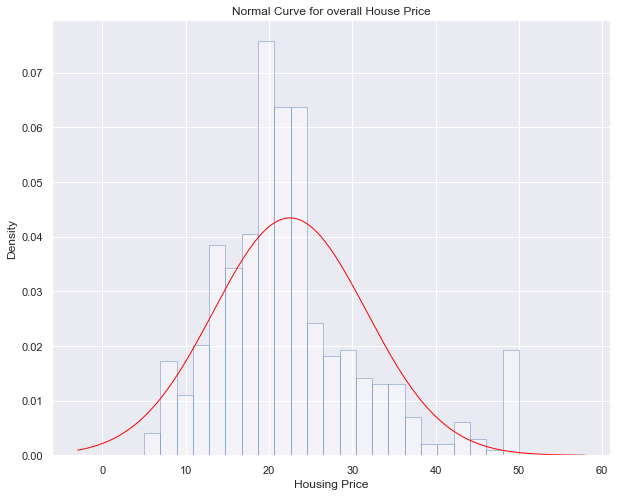

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fig, ax = plt.subplots(figsize=(10,8))
sns.set(color_codes=True)
sns.distplot(boston["medv"], kde=False, fit=stats.norm,
             hist_kws={'color':'w', 'edgecolor':'b'},
             fit_kws={'color': 'red', 'linewidth': 1})
plt.title("Normal Curve for overall House Price")
plt.xlabel("Housing Price")
plt.ylabel("Density")

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Scatterplot<a class="anchor" id="scatterplot"></a>

#### Scatter plot with linear regression line

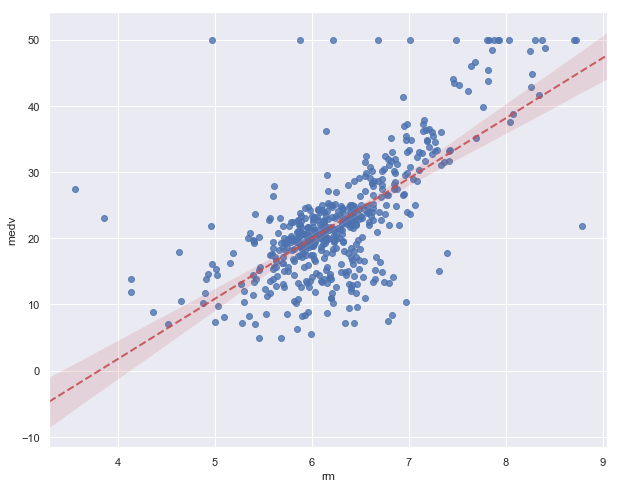

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8))
sns.set(color_codes=True)
sns.regplot(x=boston["rm"], y=boston["medv"],
           line_kws={'color':'r', 'alpha':0.9, 'lw':2, 'linestyle':'dashed'})

#### Scatter plot with regression line by linear GAM model

To impose a GAM curve on the graph as in `geom_smooth()` in `ggplot2` of the R language, the package `pygam`  should be installed for the calculation. Under the Anaconda prompt, enter

```python
pip install pygam
```

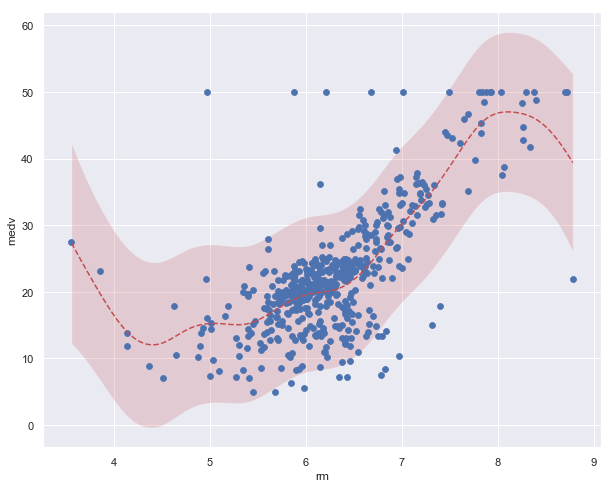

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pygam import LinearGAM
#Fit a model with the default parameters
gam = LinearGAM().fit(boston['rm'], boston['medv'])
fig, ax = plt.subplots(figsize=(10,8))
sns.set(color_codes=True)
XX = gam.generate_X_grid(term=0, n=1000)
gam_hat = gam.predict(XX)
gam_ci = gam.prediction_intervals(XX, width=.95)
plt.plot(XX, gam_hat, 'r--')
plt.fill_between(np.array([XX.tolist()[j][0] for j in range(XX.shape[0])]), 
                 np.array([gam_ci[j][0] for j in range(gam_ci.shape[0])]),
                 np.array([gam_ci[j][1] for j in range(gam_ci.shape[0])]),
                 facecolor='r', alpha=0.2)

sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None)

##### Divide the points and lines by the factor 'chas'

**Method 1: Simple Approach**

<Figure size 720x576 with 0 Axes>

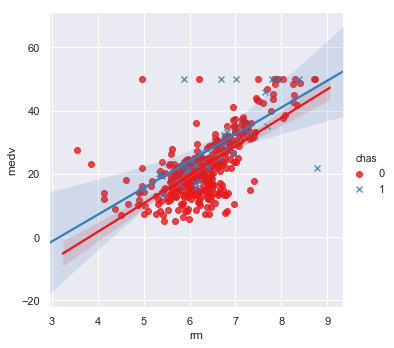

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,8))
sns.set(color_codes=True)
sns.lmplot(x="rm", y="medv", hue="chas", data=boston,
           markers=["o", "x"], palette="Set1")

**Method 2: Customized Approach**

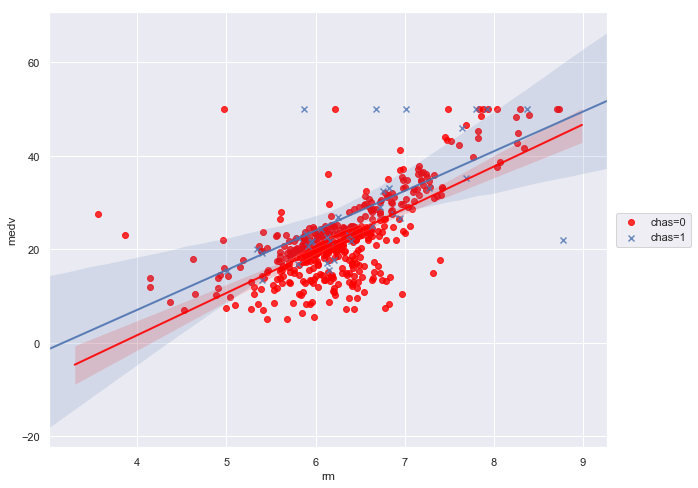

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

boston1 = boston.loc[boston['chas']==1]
boston2 = boston.loc[boston['chas']==0]
fig, ax = plt.subplots(figsize=(10,8))
sns.set(color_codes=True)
sns.regplot(x=boston2["rm"], y=boston2["medv"], marker='o', label='chas=0',
            scatter_kws={'color':'#FF0000'},
            line_kws={'color':'#FF0000', 'alpha':0.9, 'lw':2})
sns.regplot(x=boston1["rm"], y=boston1["medv"], marker='x', label='chas=1',
            scatter_kws={'color':'b'},
            line_kws={'color':'b', 'alpha':0.9, 'lw':2})
plt.legend(bbox_to_anchor=(1.16, 0.5), loc="center right")

##### Add line on the scatterplot

Text(5, 35, '')

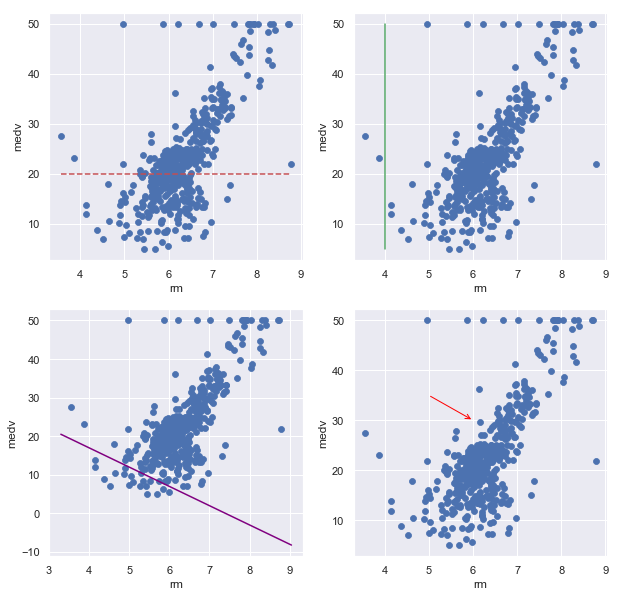

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def abline(intercept,slope,ax):
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    return (x_vals,y_vals)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
sns.set(color_codes=True)
sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None, ax=ax1)
ax1.plot([boston['rm'].min(),boston['rm'].max()], [20,20], 'r--')
sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None, ax=ax2)
ax2.plot([4,4], [boston['medv'].min(),boston['medv'].max()], 'g-')
sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None, ax=ax3)
x_vals, y_vals = abline(37,-5,ax3)
ax3.plot(x_vals, y_vals, 'purple')
sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None, ax=ax4)
ax4.annotate(s="", xy=(6, 30), xytext=(5, 35), 
             arrowprops=dict(arrowstyle='->', edgecolor='red'))

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Save a graph in PDF or in PNG format<a class="anchor" id="save"></a>

To save the above figure into a PNG file, `.savefig()` can be used.

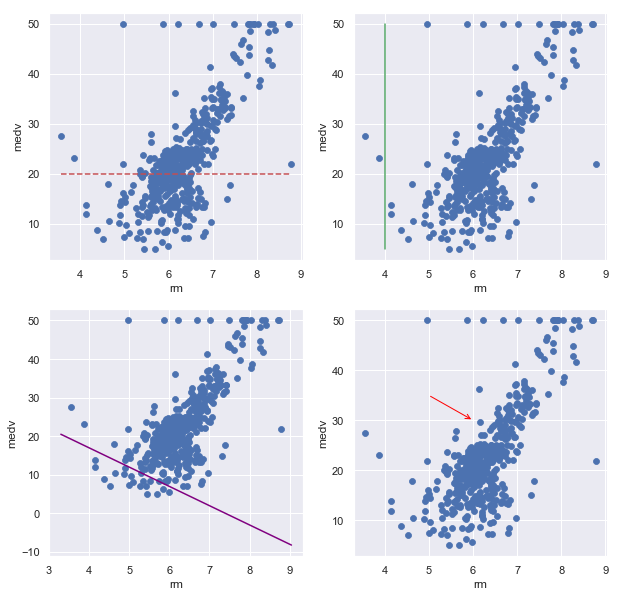

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def abline(intercept,slope,ax):
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    return (x_vals,y_vals)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
sns.set(color_codes=True)
sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None, ax=ax1)
ax1.plot([boston['rm'].min(),boston['rm'].max()], [20,20], 'r--')
sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None, ax=ax2)
ax2.plot([4,4], [boston['medv'].min(),boston['medv'].max()], 'g-')
sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None, ax=ax3)
x_vals, y_vals = abline(37,-5,ax3)
ax3.plot(x_vals, y_vals, 'purple')
sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None, ax=ax4)
ax4.annotate(s="", xy=(6, 30), xytext=(5, 35), 
             arrowprops=dict(arrowstyle='->', edgecolor='red'))
plt.savefig('scatterline.png',dpi=600)

To save the figure into a PDF file, the same method can be used with PDF file extension.

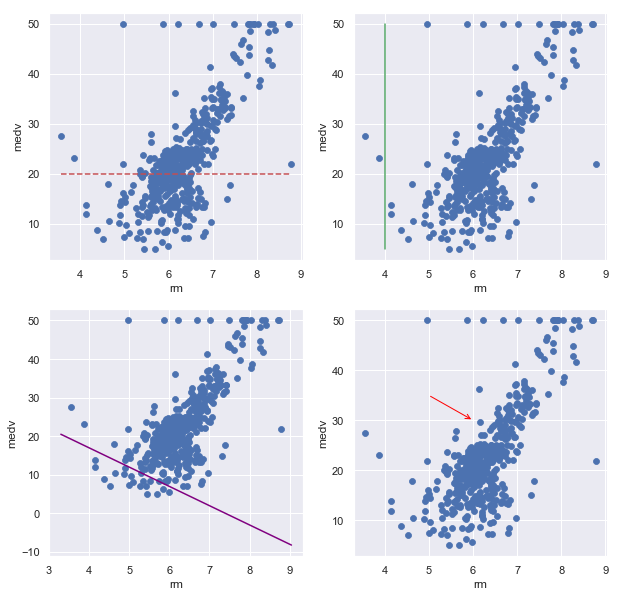

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def abline(intercept,slope,ax):
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    return (x_vals,y_vals)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
sns.set(color_codes=True)
sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None, ax=ax1)
ax1.plot([boston['rm'].min(),boston['rm'].max()], [20,20], 'r--')
sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None, ax=ax2)
ax2.plot([4,4], [boston['medv'].min(),boston['medv'].max()], 'g-')
sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None, ax=ax3)
x_vals, y_vals = abline(37,-5,ax3)
ax3.plot(x_vals, y_vals, 'purple')
sns.scatterplot(x=boston['rm'], y=boston['medv'], edgecolor=None, ax=ax4)
ax4.annotate(s="", xy=(6, 30), xytext=(5, 35), 
             arrowprops=dict(arrowstyle='->', edgecolor='red'))
plt.savefig('scatterline.pdf',dpi=600)

<div style="text-align: right"><a href="#top">Back to the top</a></div>

## Data Manipulation<a class="anchor" id="data"></a>

### Arrange rows with `sort_values()`<a class="anchor" id="arrange"></a>

`sort_values()` can reorder the rows of a DataFrame. It takes a data frame, and a set of column names (or more complicated expressions) to order by. If you provide more than one column name, each additional column will be used to break ties in the values of preceding columns:

In [17]:
# ascending order first by "crim" and then by "indus"
# crim: per capita crime rate by town
# indus: proportion of non-retail business acres per town
boston.sort_values(by=['crim', 'indus']).iloc[:6,:]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
284,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
285,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,394.74,5.49,32.7
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9


In [18]:
# descending order of "indus"
boston.sort_values(by='indus', ascending=False).iloc[:6,:]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1
123,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188,19.1,370.31,25.41,17.3


In [19]:
# ascending order of "crim", but descending order of "indus"
boston.sort_values(by=['crim', 'indus'], ascending=[True, False]).iloc[:6,:]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
284,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
285,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,394.74,5.49,32.7
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9


In [20]:
# alternatively, the rows can be sorted baased on e rank index of boston['crim']
boston.loc[boston['crim'].sort_values().index]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
284,0.00906,90.0,2.97,0,0.4000,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
285,0.01096,55.0,2.25,0,0.3890,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
341,0.01301,35.0,1.52,0,0.4420,7.241,49.3,7.0379,1,284,15.5,394.74,5.49,32.7
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
54,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6
194,0.01439,60.0,2.93,0,0.4010,6.604,18.8,6.2196,1,265,15.6,376.70,4.38,29.1
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5


In [21]:
boston.loc[boston['crim'].sort_values().index[:6]]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
284,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
285,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,394.74,5.49,32.7
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9


In [22]:
boston.loc[boston['crim'].sort_values(ascending=False).index[:6]]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5


<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Transform columns with `assign()`<a class="anchor" id="addcol"></a>

Besides selecting a subset of existing columns, it is often useful to add new columns that are functions of existing columns. This is the job of `assign()`:

In [23]:
# Construct a new column named "new_col", whose values are obtained by existing column "crim"
new_df = boston.assign(new_col = boston['crim'] * 100)
new_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,new_col
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.632
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,2.731
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,2.729
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3.237
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,6.905


In [24]:
# Alternatively, new column can be constructed by lambda function
new_df = boston.assign(new_col = lambda x: x.crim * 100)
new_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,new_col
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.632
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,2.731
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,2.729
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3.237
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,6.905


In [25]:
# Also, two columns can be constructed using one assign() function
new_df = boston.assign(new_col1 = boston['crim'] * 100,
                       new_col2 = lambda x: x.crim * 100)
new_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,new_col1,new_col2
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.632,0.632
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,2.731,2.731
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,2.729,2.729
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3.237,3.237
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,6.905,6.905


<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Filter rows with `query()`<a class="anchor" id="filter"></a>

`query()` allows you to select a subset of rows.

**Useful query operators in the argument**

- ==, !=, >, >=, <. <=
- and (&), or (|), not (!), not in
- isnull()
- .. < .. < .. (chaining comparison operators)

In [26]:
# select all the rows where column chas == 1
boston.query("chas == 1")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
142,3.32105,0.0,19.58,1,0.8710,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
152,1.12658,0.0,19.58,1,0.8710,5.012,88.0,1.6102,5,403,14.7,343.28,12.12,15.3
154,1.41385,0.0,19.58,1,0.8710,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
155,3.53501,0.0,19.58,1,0.8710,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
160,1.27346,0.0,19.58,1,0.6050,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
208,0.13587,0.0,10.59,1,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
209,0.43571,0.0,10.59,1,0.4890,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0
210,0.17446,0.0,10.59,1,0.4890,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,21.7


In [27]:
# select all the rows where column age <= 30 
# age: proportion of owner-occupied units built prior to 1940
# Only the first 6 rows are shown
boston.query("age <= 30").iloc[:6,:] 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,26.6
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3
43,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7


In [28]:
# we can also use more than one condition, by boolean operators: "&" and "|"
boston.query("chas == 1 & age <= 30")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
277,0.06127,40.0,6.41,1,0.447,6.826,27.6,4.8628,4,254,17.6,393.45,4.16,33.1
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0


In [29]:
boston.query("chas == 1 | age <= 30").iloc[:6,:]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,26.6
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3
43,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7


In [30]:
# select all the rows where the specified column belongs to a set of elements 
# rad: index of accessibility to radial highways
boston.query("rad in [1,3,5]").iloc[:6,:] 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


Furthermore, `pandas` also provides a function `filter()`. For details, you may refer to the following link:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Group operations with `groupby()`<a class="anchor" id="group"></a>

It will become really powerful when you apply them to groups of observations within a dataset.The `groupby()` function splits a dataset into several groups, and then we can calculate for example, the mean, max, min for each group of observations.

In [31]:
# Grouped by chas, and then get the mean of each group
boston.groupby('chas')['medv'].mean()

chas
0    22.093843
1    28.440000
Name: medv, dtype: float64

In [32]:
# Grouped by chas, and then get the sample size of each group
boston.groupby('chas')['medv'].count()

chas
0    471
1     35
Name: medv, dtype: int64

In [33]:
# Grouped by chas, and then get the minimal of each group
boston.groupby('chas')['medv'].min()

chas
0     5.0
1    13.4
Name: medv, dtype: float64

In [34]:
# Grouped by chas and rad, and then get the mean of each group
boston.groupby(['chas', 'rad'])['medv'].mean()

chas  rad
0     1      23.015789
      2      26.833333
      3      27.927778
      4      21.040196
      5      25.521154
      6      20.976923
      7      27.105882
      8      31.505263
      24     15.438710
1     1      50.000000
      3      27.950000
      4      25.812500
      5      27.463636
      8      26.000000
      24     31.362500
Name: medv, dtype: float64

The output of `groupby()` will have an index or multi-index on rows corresponding to our chosen grouping variables. To avoid setting this index, pass `as_index=False` to the `groupby` operation.

In [35]:
boston.groupby(['chas', 'rad'], as_index=False)['medv'].mean()

,chas,rad,medv
0,0,1,23.015789
1,0,2,26.833333
2,0,3,27.927778
3,0,4,21.040196
4,0,5,25.521154
5,0,6,20.976923
6,0,7,27.105882
7,0,8,31.505263
8,0,24,15.438710
9,1,1,50.000000


For the calculation of multiple statistics, `agg()` function can be used.

In [36]:
# Group the data frame by chas and rad and extract mean and count from each group
boston.groupby(['chas', 'rad']).agg({'medv': ["mean", "count"]})

medv      
               mean count
chas rad                 
0    1    23.015789    19
     2    26.833333    24
     3    27.927778    36
     4    21.040196   102
     5    25.521154   104
     6    20.976923    26
     7    27.105882    17
     8    31.505263    19
     24   15.438710   124
1    1    50.000000     1
     3    27.950000     2
     4    25.812500     8
     5    27.463636    11
     8    26.000000     5
     24   31.362500     8

In [37]:
# Group the data frame by chas and rad and extract mean and count from each group
boston.groupby(['chas', 'rad']).agg({'medv': ["mean", "count"],
                                    'crim': "mean"})

medv             crim
               mean count       mean
chas rad                            
0    1    23.015789    19   0.037135
     2    26.833333    24   0.083285
     3    27.927778    36   0.094087
     4    21.040196   102   0.409490
     5    25.521154   104   0.622514
     6    20.976923    26   0.150054
     7    27.105882    17   0.150399
     8    31.505263    19   0.345052
     24   15.438710   124  13.209833
1    1    50.000000     1   0.015010
     3    27.950000     2   0.156265
     4    25.812500     8   0.195176
     5    27.463636    11   1.304961
     8    26.000000     5   0.471570
     24   31.362500     8   5.775886

<div style="text-align: right"><a href="#top">Back to the top</a></div>